## 📊💳 Análise de intenções de compra on line 📊💳

<div align="justify"><font size="3">  O conjunto de dados consiste em vetores de recursos pertencentes a 12.330 sessões. O conjunto de dados foi formado de forma que cada sessão pertencesse a um usuário diferente no período de 1 ano para evitar qualquer tendência a uma campanha, dia especial, perfil de usuário ou período específico. </font></div>



##🕵️‍♀️ Variáveis do Dataset


- Administrative: Número de páginas visitadas pelo usuário para atividades relacionadas ao gerenciamento de contas de usuário;

- Administrative Duration: Tempo gasto nas páginas administrativas pelo usuário;*texto em itálico*

- Informational: Número de páginas visitadas pelo usuário sobre o site;

- Informational Duration: Tempo gasto em páginas informativas pelo usuário;

- Product Related: Número de páginas relacionadas ao produto visitadas pelo usuário;

- Product Related Duration: tempo gasto pelo usuário nas páginas relacionadas ao produto;

- Bounce Rates: taxa média de rejeição das páginas visitadas pelo usuário. Representa a porcentagem de visitantes que entram no site e depois saem, em vez de continuarem a visualizar outras páginas do mesmo site;

- Exit Rates: taxa média de saída das páginas visitadas pelo usuário. É a porcentagem de pessoas que saíram do seu site a partir dessa página;

- Page Values: valor médio das páginas visitadas pelo usuário. É o valor médio de uma página que um usuário visitou antes de chegar à página de meta ou concluir uma transação de comércio eletrônico (ou ambos);

- Special Day: Proximidade do dia da visita com um evento especial como o Dia das Mães ou festivais como o Natal;

- Month: Mês de visita durante todo o ano;

- Operating Systems: Sistemas Operacionais do visitante;

- Browser: Navegador do visitante;

- Region: Região geográfica a partir da qual a sessão foi iniciada pelo visitante;

- Traffic Type: Fonte de tráfego através da qual o usuário entrou no site;

- Visitor Type: Define a natureza do usuário;

- Weekend: Define se o usuário visitou o site no final de semana ou não;

- Revenue: Define se o usuário concluiu a compra ou não.

##📥 Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans # importando o k-means

## 🎣Extração do DataSet

In [2]:
# Clonando o repositório com o dataset

! git clone https://github.com/AnaCarolNP/Machine-Learning-II-ProjetoFinal

fatal: destination path 'Machine-Learning-II-ProjetoFinal' already exists and is not an empty directory.


In [3]:
# Carregando o dataset

shoppers_intention = pd.read_csv('./Machine-Learning-II-ProjetoFinal/online_shoppers_intention.csv', sep=';',decimal=',')

In [4]:
shoppers_intention.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0,0,0,2,64,0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0,0,0,2,2.666.666.667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0,0,0,10,627.5,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,True,False


##🧹 Limpeza dos Dados

In [5]:
print(f'O dataset possui {shoppers_intention.shape[0]} linhas e {shoppers_intention.shape[1]} colunas')

O dataset possui 12330 linhas e 18 colunas


In [6]:
# Visualizando informações básicas do dataset como informações nulas e tipo de variáveis

shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Administrative           12330 non-null  int64 
 1   Administrative_Duration  12330 non-null  object
 2   Informational            12330 non-null  int64 
 3   Informational_Duration   12330 non-null  object
 4   ProductRelated           12330 non-null  int64 
 5   ProductRelated_Duration  12330 non-null  object
 6   BounceRates              12330 non-null  object
 7   ExitRates                12330 non-null  object
 8   PageValues               12330 non-null  object
 9   SpecialDay               12330 non-null  object
 10  Month                    12330 non-null  object
 11  OperatingSystems         12330 non-null  int64 
 12  Browser                  12330 non-null  int64 
 13  Region                   12330 non-null  int64 
 14  TrafficType              12330 non-nul

In [7]:
#verificar nome das colunas para possivel ajuste

shoppers_intention.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [8]:
# Verificando se há dados duplicados

shoppers_intention[shoppers_intention.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0,0,0,1,0,0.2,0.2,0,0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0,0,0,1,0,0.2,0.2,0,0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0,0,0,1,0,0.2,0.2,0,0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0,0,0,1,0,0.2,0.2,0,0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0,0,0,1,0,0.2,0.2,0,0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0,0,0,1,0,0.2,0.2,0,0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0,0,0,1,0,0.2,0.2,0,0,Dec,1,13,9,20,Returning_Visitor,False,False


In [9]:
# Removendo dados duplicados

shoppers_intention.drop_duplicates(inplace=True)

In [10]:
# Validando ação anterior

shoppers_intention.duplicated().sum()

0

In [11]:
# Verificando se existem dados nulos

shoppers_intention.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Agora transformaremos as variáveis categóricas e numéricas com dummy e encoder

In [12]:
shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Administrative           12205 non-null  int64 
 1   Administrative_Duration  12205 non-null  object
 2   Informational            12205 non-null  int64 
 3   Informational_Duration   12205 non-null  object
 4   ProductRelated           12205 non-null  int64 
 5   ProductRelated_Duration  12205 non-null  object
 6   BounceRates              12205 non-null  object
 7   ExitRates                12205 non-null  object
 8   PageValues               12205 non-null  object
 9   SpecialDay               12205 non-null  object
 10  Month                    12205 non-null  object
 11  OperatingSystems         12205 non-null  int64 
 12  Browser                  12205 non-null  int64 
 13  Region                   12205 non-null  int64 
 14  TrafficType              12205 non-nul

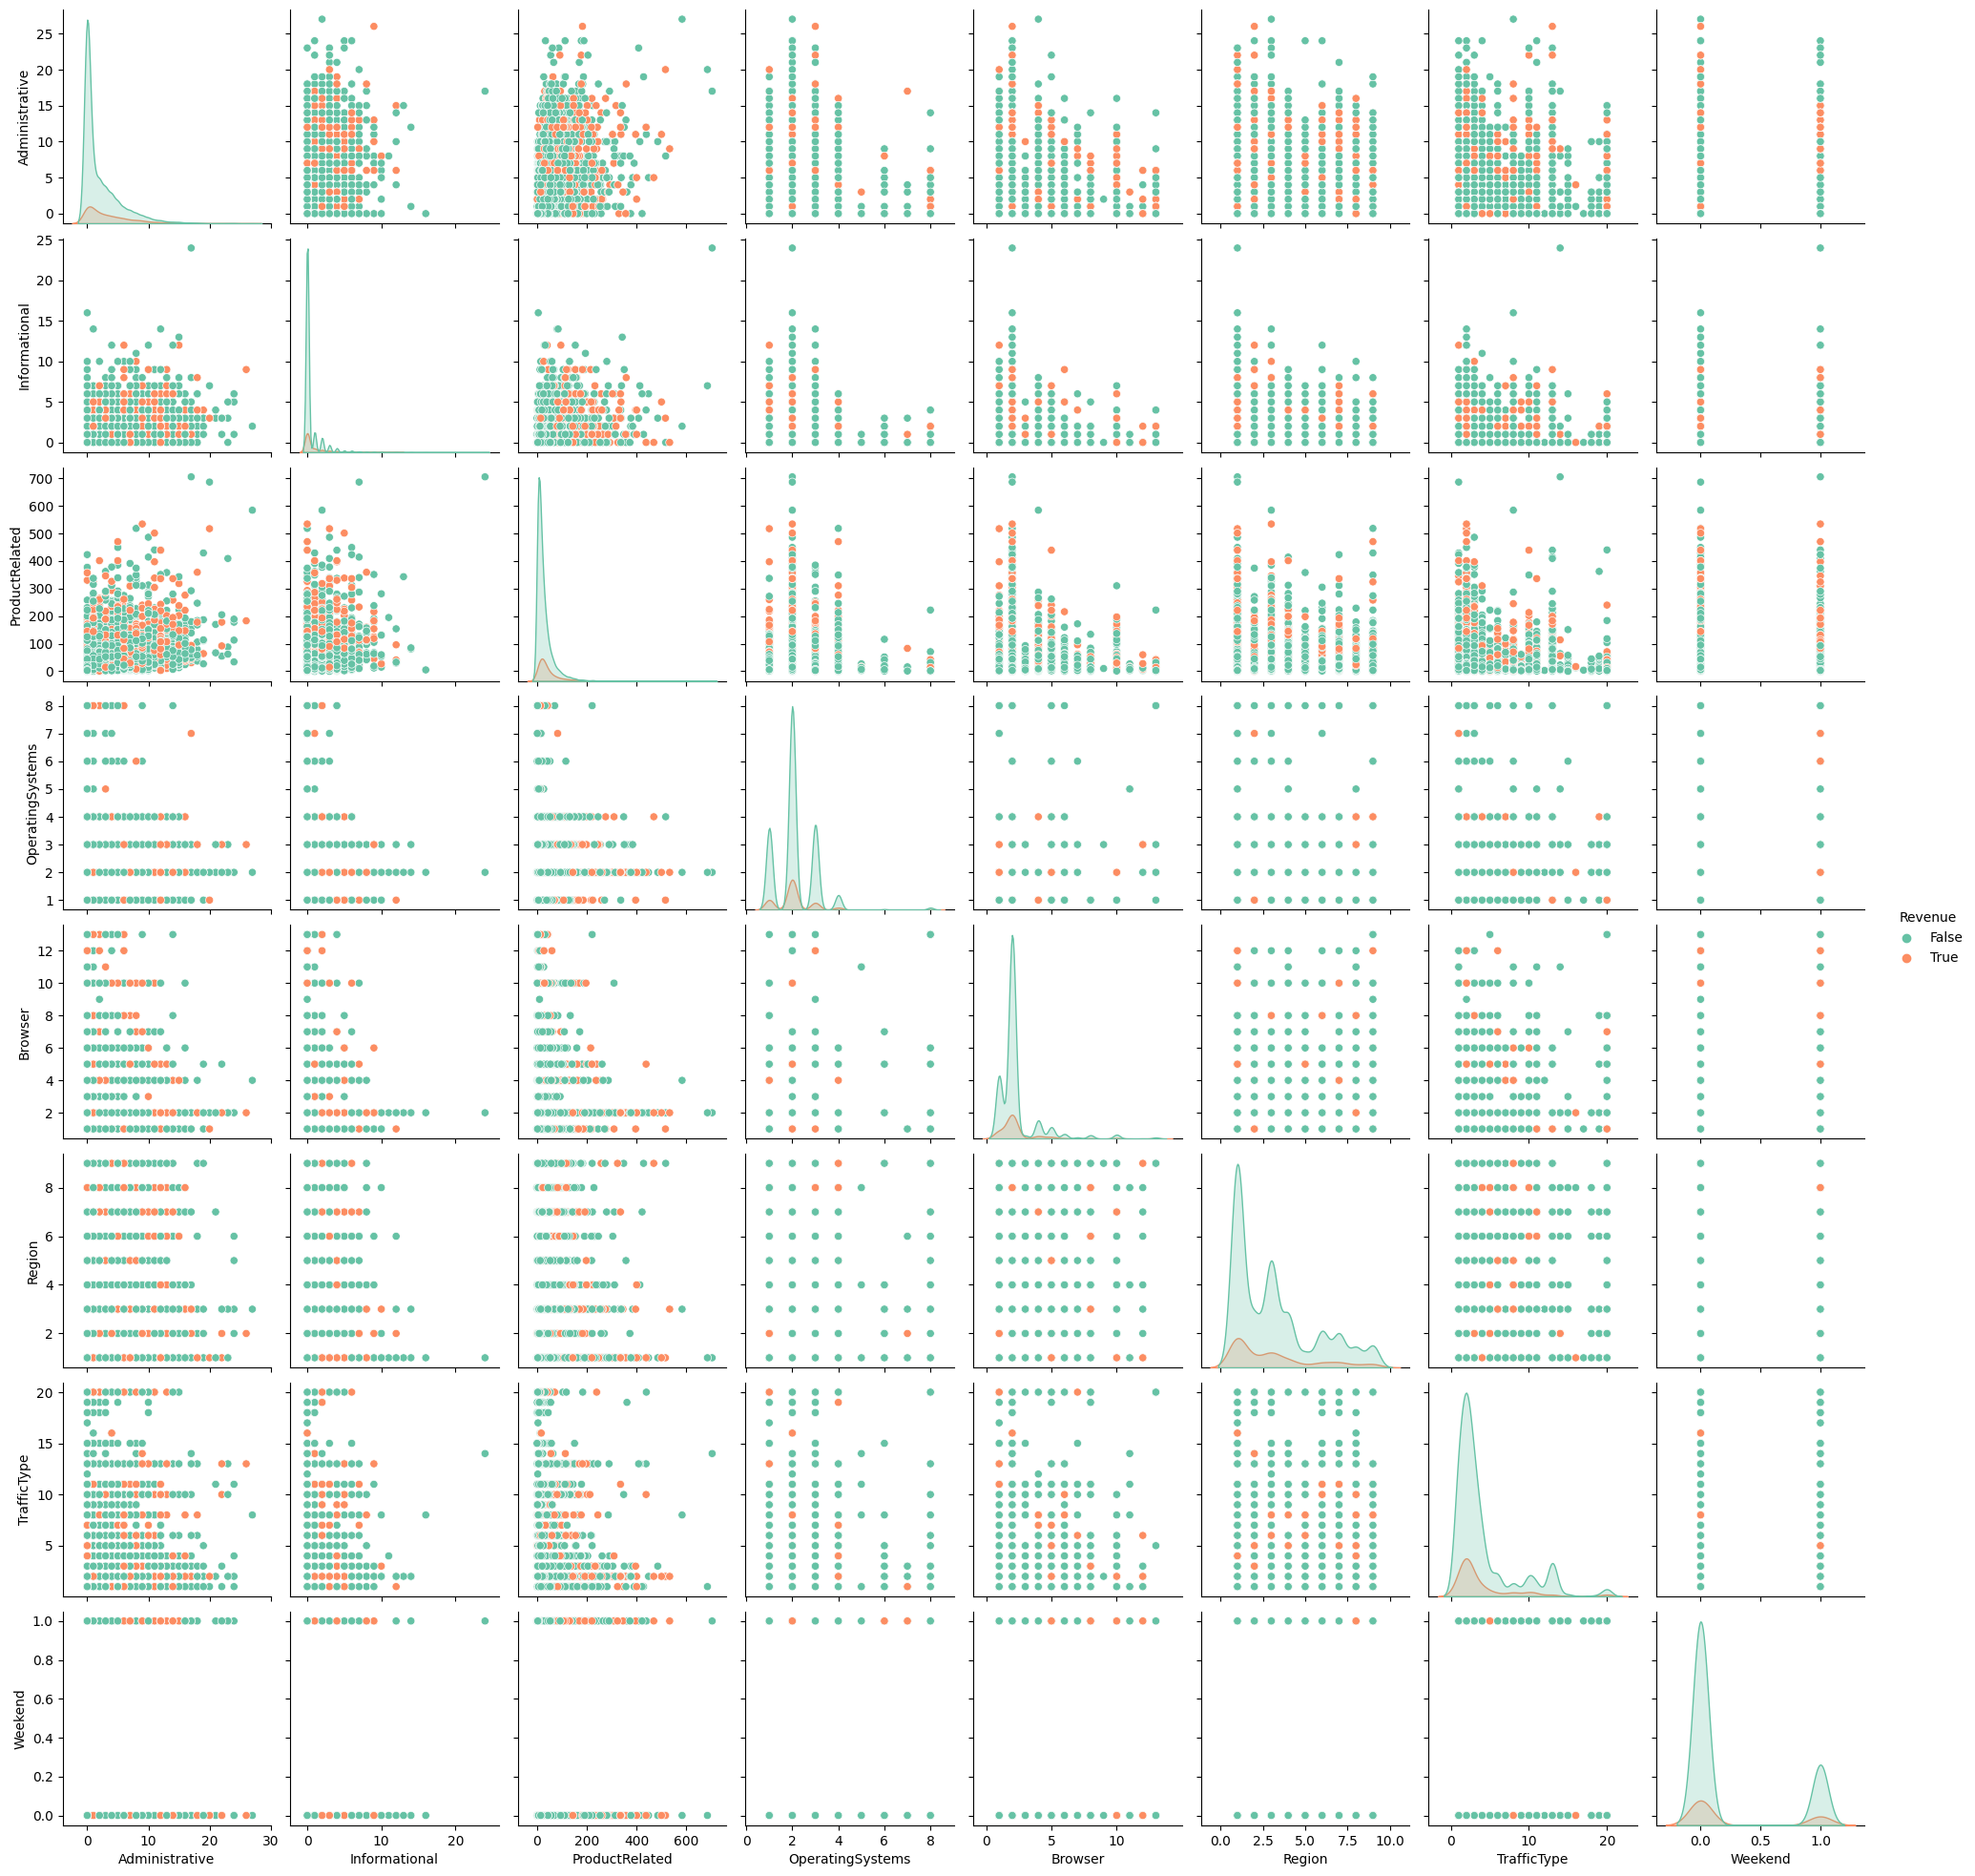

In [13]:
sns.pairplot(data=shoppers_intention,hue="Revenue",palette="Set2")
plt.show()

É difícil separar os clusteres de quem comprou ou não

Revenue é nosso target, o que indica se houve ou não compra em questão e iremos encodá-la

In [14]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
shoppers_intention['Revenue']= label_encoder.fit_transform(shoppers_intention['Revenue'])

Existem muito mais não compradores que compradores

Iremos encodar também Weekend, que indica se foi ao final de semana ou não

In [15]:
shoppers_intention['Weekend']= label_encoder.fit_transform(shoppers_intention['Weekend'])

In [16]:
# Validando as operações anteriores

shoppers_intention.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0,1,0,0.2,0.2,0,0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0,0,0,2,64,0,0.1,0,0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0,0,0,1,0,0.2,0.2,0,0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0,0,0,2,2.666.666.667,0.05,0.14,0,0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0,0,0,10,627.5,0.02,0.05,0,0,Feb,3,3,1,4,Returning_Visitor,1,0


In [17]:
shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Administrative           12205 non-null  int64 
 1   Administrative_Duration  12205 non-null  object
 2   Informational            12205 non-null  int64 
 3   Informational_Duration   12205 non-null  object
 4   ProductRelated           12205 non-null  int64 
 5   ProductRelated_Duration  12205 non-null  object
 6   BounceRates              12205 non-null  object
 7   ExitRates                12205 non-null  object
 8   PageValues               12205 non-null  object
 9   SpecialDay               12205 non-null  object
 10  Month                    12205 non-null  object
 11  OperatingSystems         12205 non-null  int64 
 12  Browser                  12205 non-null  int64 
 13  Region                   12205 non-null  int64 
 14  TrafficType              12205 non-nul

Dummyzando Tipo de Visitante e Mês

<Axes: xlabel='VisitorType', ylabel='count'>

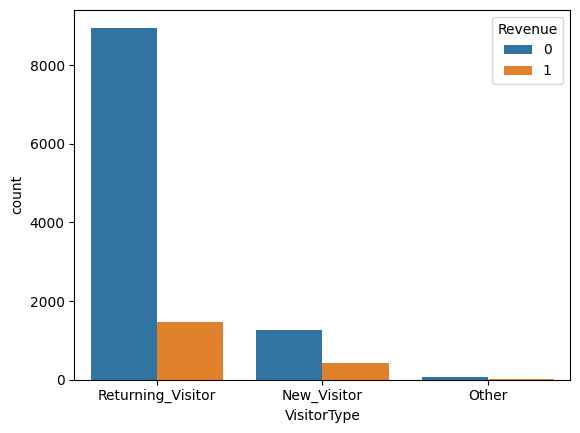

In [18]:
sns.countplot(x='VisitorType', hue='Revenue', data=shoppers_intention)

Pessoas que visitam mais de uma vez tem maior chance de comprar algo e também mais chance de não comprar

In [19]:
shoppers_intention= pd.get_dummies(shoppers_intention, columns = ['Month','VisitorType'])

In [20]:
shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Administrative                 12205 non-null  int64 
 1   Administrative_Duration        12205 non-null  object
 2   Informational                  12205 non-null  int64 
 3   Informational_Duration         12205 non-null  object
 4   ProductRelated                 12205 non-null  int64 
 5   ProductRelated_Duration        12205 non-null  object
 6   BounceRates                    12205 non-null  object
 7   ExitRates                      12205 non-null  object
 8   PageValues                     12205 non-null  object
 9   SpecialDay                     12205 non-null  object
 10  OperatingSystems               12205 non-null  int64 
 11  Browser                        12205 non-null  int64 
 12  Region                         12205 non-null  int64 
 13  T

Agora iremos transformar as variáveis que deveriam ser numérica com astype

In [21]:
shoppers_intention['Administrative_Duration'] = shoppers_intention['Administrative_Duration'].str.replace('.', '').astype(float)

<ipython-input-21-182386fe95e3>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shoppers_intention['Administrative_Duration'] = shoppers_intention['Administrative_Duration'].str.replace('.', '').astype(float)


In [22]:
shoppers_intention['BounceRates'] = shoppers_intention['BounceRates'].astype(float)

In [23]:
shoppers_intention['ExitRates'] = shoppers_intention['ExitRates'].astype(float)

In [24]:
shoppers_intention['SpecialDay'] = shoppers_intention['SpecialDay'].astype(float)

In [25]:
shoppers_intention['PageValues'] = shoppers_intention['PageValues'].str.replace('.', '').astype(float)


<ipython-input-25-aafca0665d45>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shoppers_intention['PageValues'] = shoppers_intention['PageValues'].str.replace('.', '').astype(float)


In [26]:
shoppers_intention['ProductRelated_Duration'] = shoppers_intention['ProductRelated_Duration'].str.replace('.', '').astype(float)


<ipython-input-26-414530ee4cfe>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shoppers_intention['ProductRelated_Duration'] = shoppers_intention['ProductRelated_Duration'].str.replace('.', '').astype(float)


In [27]:
shoppers_intention['Informational_Duration'] = shoppers_intention['Informational_Duration'].str.replace('.', '').astype(float)


<ipython-input-27-7bc1cb9079b5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  shoppers_intention['Informational_Duration'] = shoppers_intention['Informational_Duration'].str.replace('.', '').astype(float)


In [28]:
shoppers_intention.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12205 entries, 0 to 12329
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Administrative                 12205 non-null  int64  
 1   Administrative_Duration        12205 non-null  float64
 2   Informational                  12205 non-null  int64  
 3   Informational_Duration         12205 non-null  float64
 4   ProductRelated                 12205 non-null  int64  
 5   ProductRelated_Duration        12205 non-null  float64
 6   BounceRates                    12205 non-null  float64
 7   ExitRates                      12205 non-null  float64
 8   PageValues                     12205 non-null  float64
 9   SpecialDay                     12205 non-null  float64
 10  OperatingSystems               12205 non-null  int64  
 11  Browser                        12205 non-null  int64  
 12  Region                         12205 non-null 

##🔍 Análise Exploratória de Dados

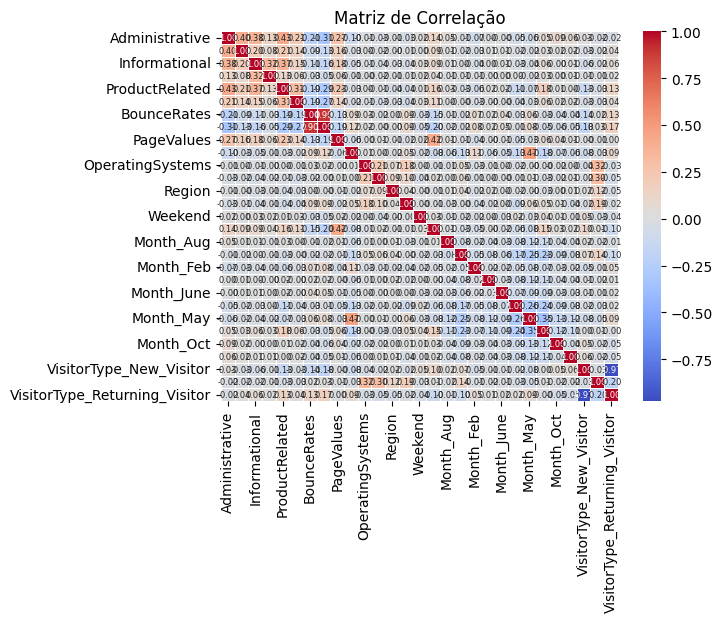

In [29]:
#verificando correlação entre as colunas do dataframe

correlacao = shoppers_intention.corr()

annot_kws = {'size': 6}
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws=annot_kws, fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [30]:
shoppers_intention.corr()['Revenue'].sort_values(ascending=False)


Revenue                          1.000000
PageValues                       0.421688
ProductRelated                   0.156042
Month_Nov                        0.154274
Administrative                   0.136330
ProductRelated_Duration          0.106906
VisitorType_New_Visitor          0.102694
Informational                    0.093626
Administrative_Duration          0.086984
Informational_Duration           0.040835
Month_Oct                        0.031757
Weekend                          0.027729
Browser                          0.024052
Month_Sep                        0.019154
Month_Aug                        0.010134
VisitorType_Other                0.009273
Month_Jul                       -0.001873
TrafficType                     -0.005618
Region                          -0.012725
OperatingSystems                -0.014927
Month_June                      -0.023237
Month_Dec                       -0.032985
Month_Feb                       -0.047214
Month_Mar                       -0

O ExitRates apresenta uma correlação negativa com PageValues e nossa hipótese é que sessões com altas taxas de saída e indicam menor envolvimento e menos conversões.

<Axes: xlabel='Revenue', ylabel='count'>

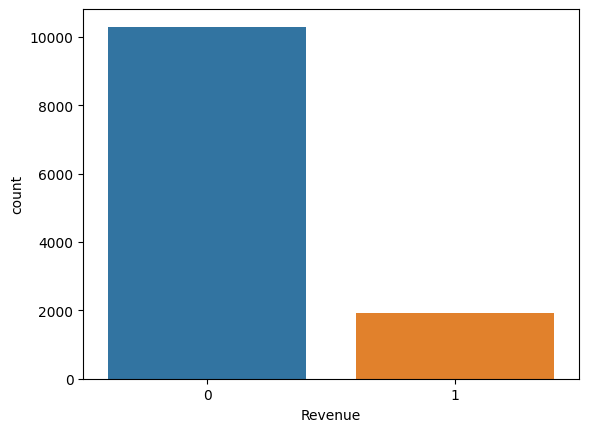

In [31]:
sns.countplot(x='Revenue', data=shoppers_intention)

In [32]:
shoppers_intention.Revenue.value_counts(normalize=True)*100

0    84.367063
1    15.632937
Name: Revenue, dtype: float64

Este conjunto de dados está desequilibrado com  15% das sessões resultando em uma compra. Assim podemos considerar métodos ou algoritmos adequados para lidar com conjuntos de dados desequilibrados.

<Axes: xlabel='Weekend', ylabel='count'>

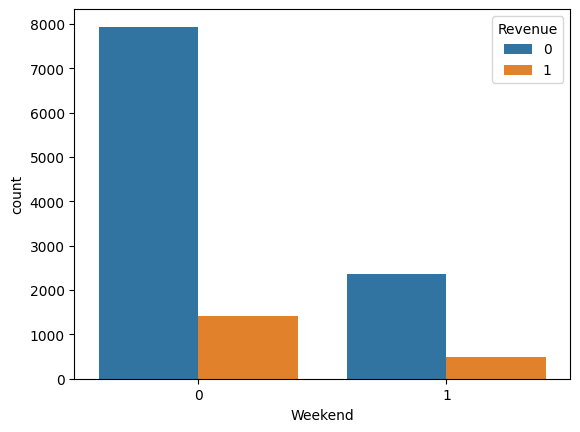

In [33]:
sns.countplot(x='Weekend', hue='Revenue', data=shoppers_intention)

Pessoas geralmente compram menos no fim de semana

## 🧩 Clusterização por Kmeans

Começando pelo K Means temos que visualizar qual o tamanho de clusteres ideal, iremos utilizar o método do cotovelo

In [34]:
features= shoppers_intention[['PageValues', 'ProductRelated','ProductRelated_Duration','VisitorType_New_Visitor']]
features.shape

(12205, 4)

In [35]:
features

,PageValues,ProductRelated,ProductRelated_Duration,VisitorType_New_Visitor
0,0.000000e+00,1,0.000000e+00,0
1,0.000000e+00,2,6.400000e+01,0
2,0.000000e+00,1,0.000000e+00,0
3,0.000000e+00,2,2.666667e+09,0
4,0.000000e+00,10,6.275000e+03,0
...,...,...,...,...
12325,1.224172e+09,53,1.783792e+09,0
12326,0.000000e+00,5,4.657500e+04,0
12327,0.000000e+00,6,1.842500e+04,0
12328,0.000000e+00,15,3.460000e+02,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

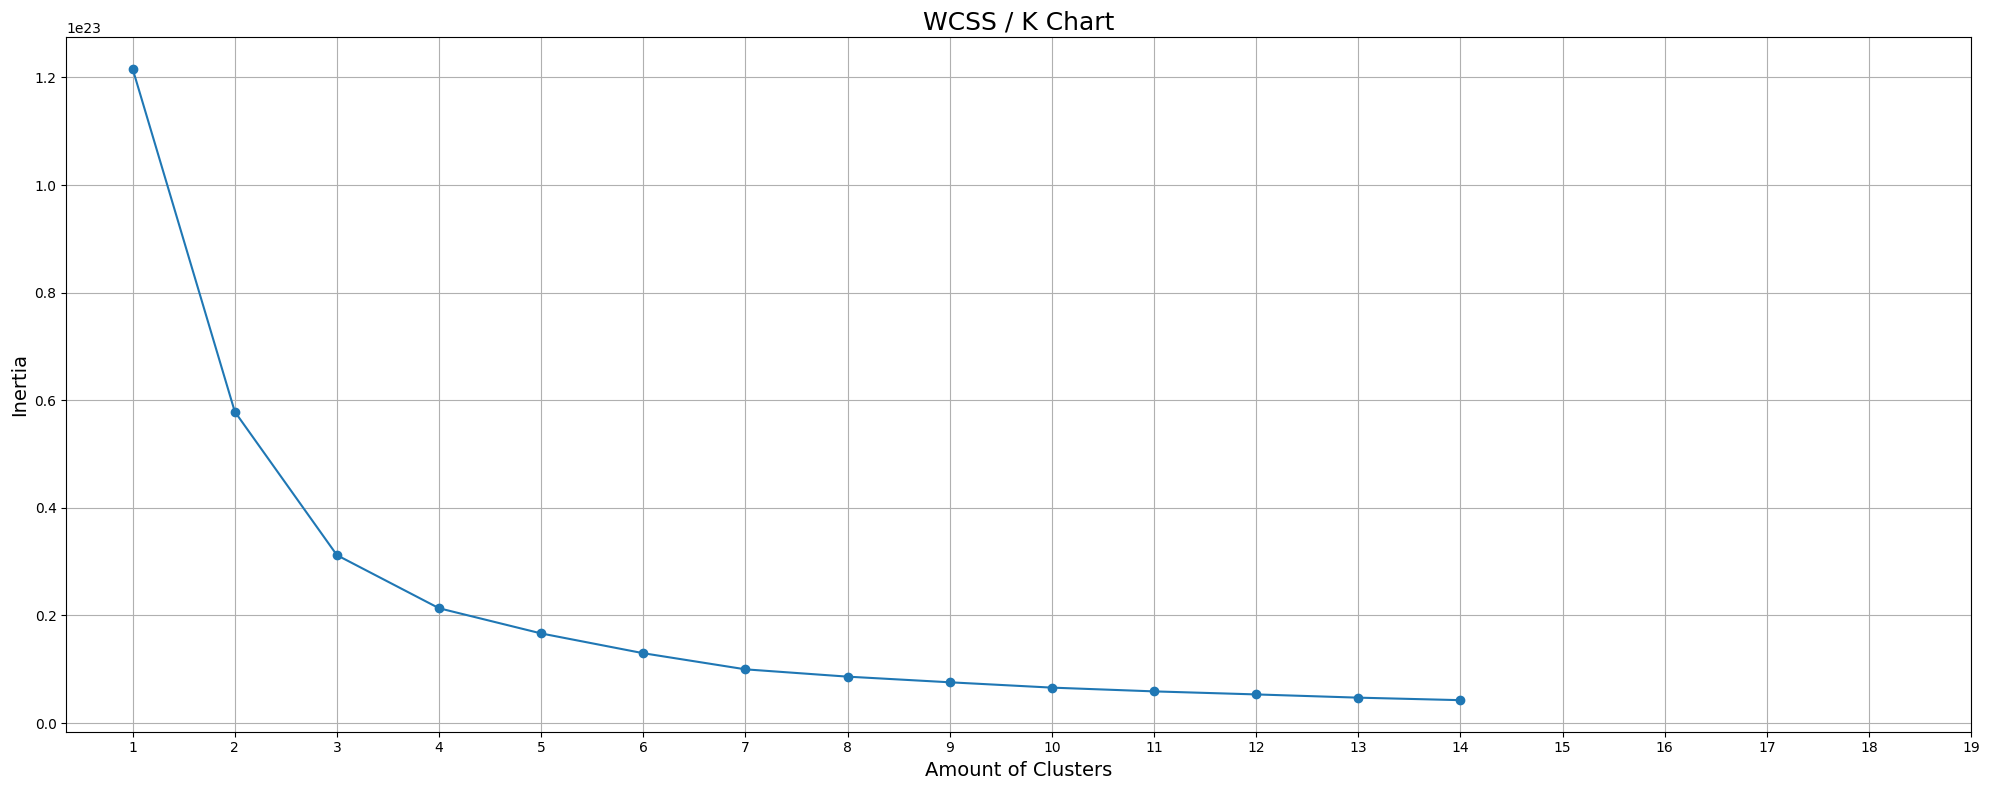

In [36]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

Os clusteres indicados parecem ser 2 ou 3, iremos testar com ambos.

Usando as colunas PageValues e ProductRelated que tem maior correlação com Revenue, nosso target, o que indica que quanto mais tempo em páginas relacionadas ao produto desejado, mais o usuário tende a comprar, temos que:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-37-d93e2d4b177d>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features["labels"] = kmeans.fit_predict(features)
<ipython-input-37-d93e2d4b177d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.drop(["labels"],axis=1,inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: Futu

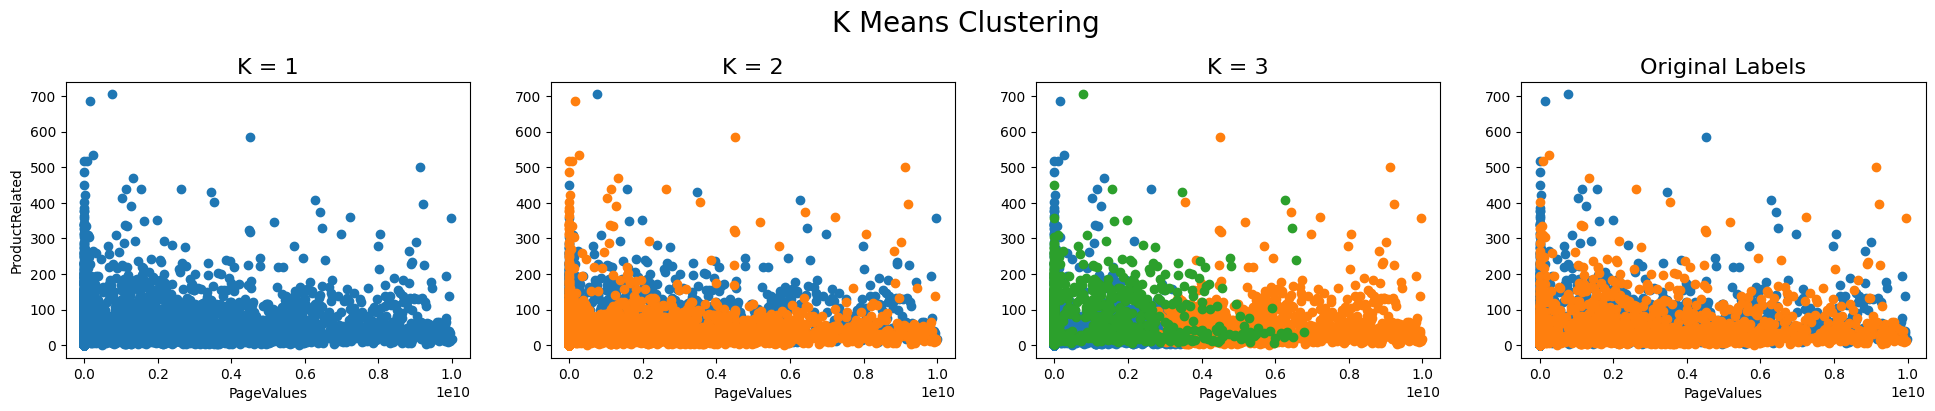

In [37]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,4,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PageValues")
plt.ylabel("ProductRelated")
plt.scatter(features.PageValues,features.ProductRelated)


plt.subplot(1,4,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PageValues")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PageValues[features.labels == 0],features.ProductRelated[features.labels == 0])
plt.scatter(features.PageValues[features.labels == 1],features.ProductRelated[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,4,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PageValues")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PageValues[features.labels == 0],features.ProductRelated[features.labels == 0])
plt.scatter(features.PageValues[features.labels == 1],features.ProductRelated[features.labels == 1])
plt.scatter(features.PageValues[features.labels == 2],features.ProductRelated[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,4,4)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PageValues")
plt.scatter(shoppers_intention.PageValues[shoppers_intention.Revenue == 0],shoppers_intention.ProductRelated[shoppers_intention.Revenue == 0])
plt.scatter(shoppers_intention.PageValues[shoppers_intention.Revenue == 1],shoppers_intention.ProductRelated[shoppers_intention.Revenue == 1])

plt.subplots_adjust(top=0.8)
plt.show()

Com exceção de alguns pontos, o KMeans fez um trabalho ótimo com 2 clusters. A previsão é praticamente idêntica à original com rótulos. Isso demonstra que o nosso gráfico do COTOVELO estava correto.

In [38]:
kmeans = KMeans(n_clusters=2)
y_means = kmeans.fit_predict(features)
labels_pred = y_means
labels_true = shoppers_intention['Revenue']

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print('Adjusted rand index:')
print(score)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Adjusted rand index:
0.05843774165976994


Esse valor indica que os agrupamentos comparados não estão muito correlacionados. Ou seja, os grupos não são muito similares ou consistentes entre si.

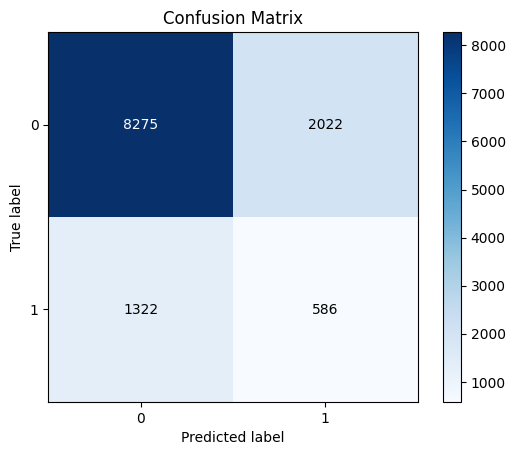

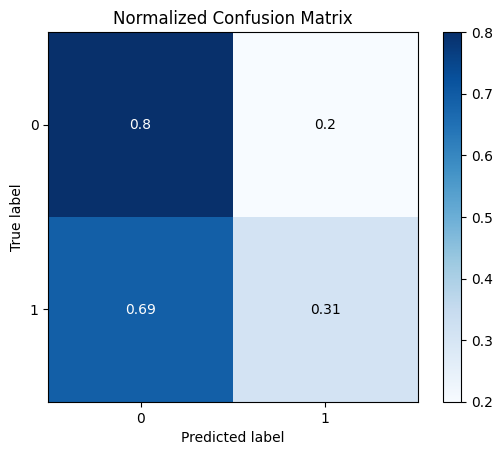

In [39]:
!pip install scikit-plot

import scikitplot as skplt

plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

## 🚀 Desempenho do Modelo e Considerações Finais



O modelo classificou corretamente 2022 (20%) instâncias como clientes não interessados (rótulo 0) e estavam corretas. Essas instâncias correspondem a sessões que não resultaram em compra (clientes não interessados).

O modelo classificou corretamente 1322 (69%) instâncias como clientes interessados (rótulo 1) e estavam corretas. Essas instâncias correspondem a sessões bem-sucedidas em termos de receita, ou seja, clientes que estavam realmente interessados em fazer uma compra.

O modelo classificou incorretamente 8275 (80%) instâncias como clientes interessados (rótulo 1), mas esses clientes na verdade não estavam interessados em comprar.

O modelo classificou incorretamente 586 (31%) instâncias como clientes não interessados (rótulo 0), mas esses clientes estavam, na verdade, interessados em comprar. Essas instâncias são erroneamente classificadas como clientes não interessados quando, na verdade, eram clientes interessados.

O pior resultado é o de porcentagem 31% pois é onde perdemos receita, pois o modelo está cometendo um grande número de falsos positivos, ou seja, está classificando incorretamente muitas sessões bem-sucedidas em termos de receita como clientes não interessados. Também perdemos receita na porcentagem 80% pois na verdade estamos investindo no cliente errado.

## 🧩 Clusterização por Agrupamento Hierárquico

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(features,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAMA",fontsize=18)
plt.show()

Aqui estamos utilizamos a lincagem com o método de Ward que calcula soma dos quadrados das diferenças entre os pontos de dados em um cluster e o centróide (média) desse cluster. Em seguida, ele calcula essa soma de quadrados para todos os clusters resultantes da combinação de dois clusters em um estágio de aglomeração. O método de Ward seleciona a fusão de clusters que minimiza o aumento na soma de quadrados, ou seja, a variação dentro dos clusters, formando. Isso significa que ele tende a criar clusters compactos e de baixa variância.

Parece que temos entre 2 e 3 clusteres levando em consideração a linha horizontal que corta o dendograma

Usando as colunas PageValues e ProductRelated que tem maior correlação com Revenue, nosso target, o que indica que quanto mais tempo em páginas relacionadas ao produto desejado, mais o usuário tende a comprar, temos que:

In [ ]:
from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,4,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PageValues")
plt.ylabel("ProductRelated")
plt.scatter(features.PageValues,features.ProductRelated)


plt.subplot(1,4,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PageValues")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PageValues[features.labels == 0],features.ProductRelated[features.labels == 0])
plt.scatter(features.PageValues[features.labels == 1],features.ProductRelated[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)


plt.subplot(1,4,3)
plt.title("K = 3",fontsize=16)
plt.xlabel("PageValues")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.PageValues[features.labels == 0],features.ProductRelated[features.labels == 0])
plt.scatter(features.PageValues[features.labels == 1],features.ProductRelated[features.labels == 1])
plt.scatter(features.PageValues[features.labels == 2],features.ProductRelated[features.labels == 2])


plt.subplot(1,4,4)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PageValues")
plt.scatter(shoppers_intention.PageValues[shoppers_intention.Revenue == 0],shoppers_intention.ProductRelated[shoppers_intention.Revenue == 0])
plt.scatter(shoppers_intention.PageValues[shoppers_intention.Revenue == 1],shoppers_intention.ProductRelated[shoppers_intention.Revenue == 1])

plt.subplots_adjust(top=0.8)
plt.show()

O k=2 é a melhor opção mas é perceptível a diferença entre o dataset original e o com k=2 por clustering hierárquico

In [ ]:
hc_cluster = AgglomerativeClustering(n_clusters=2)
hc_predict = hc_cluster.fit_predict(features)
labels_pred = hc_predict
labels_true = shoppers_intention['Revenue']

# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print('Adjusted rand index:')
print(score)

import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

## 🚀 Desempenho do Modelo e Considerações Finais


O modelo previu corretamente a classe positiva (clientes interessados em compra) e estavam corretos 276 vezes (14%).

O modelo previu corretamente a classe negativa (clientes não interessados em compra) e estavam corretos 9142 vezes (89%).

O modelo previu incorretamente a classe positiva (clientes interessados) quando deveria ter sido negativa (não interessados) 1155 vezes (11%).

O modelo previu incorretamente a classe negativa (clientes não interessados) quando deveria ter sido positiva (interessados) 1632 vezes (86%).

Esse modelo prediz muito bem quando o cliente não está interessado (89%), ao contrário do modelo de Kmeans (20%). Por outro lado, o modelo Kmeans prediz melhor quando o cliente está interessado (69%), enquanto no Agrupamento Hierárquico, temos 14%. Uma solução seria utilizar ambos os modelos para pontos diferentes de predição.